In [1]:
import torch
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt

path = '/Users/danny/Desktop/WL/data_new/gamma1/gamma1_19928.fits'
mean = 0
std = 0.1951

img min, max = -0.150, 0.105
noisy img min, max = -0.847, 0.825
img std = 0.015
noisy img std = 0.196
noisy SNR = -0.014


/var/folders/cb/fs27ksbj131c_0qrcl46hk740000gn/T/ipykernel_79654/3608910240.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


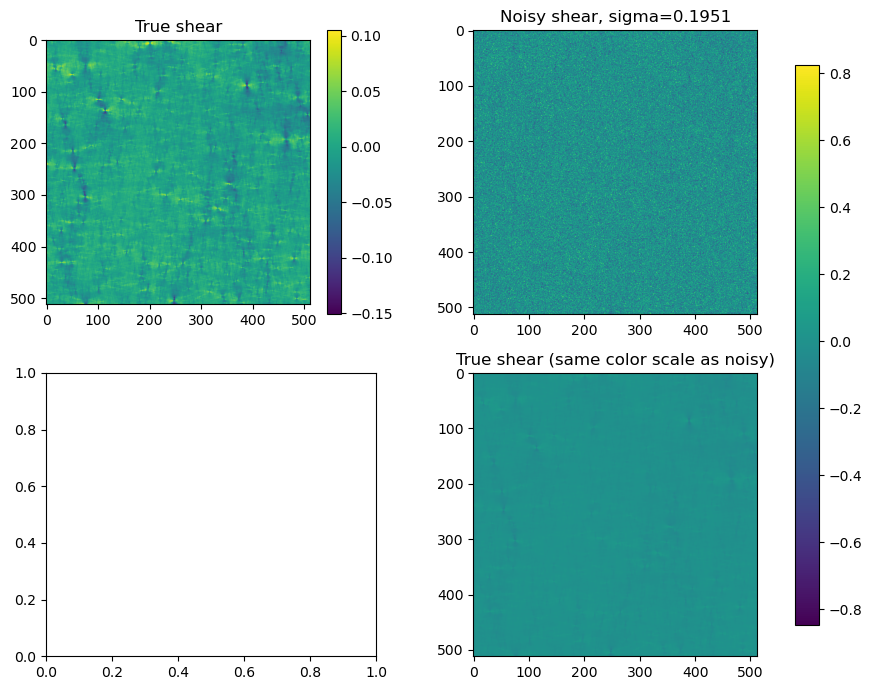

In [2]:
img = fits.open(path)[0].data
img = torch.tensor(np.float32(img))
noise = torch.randn(img.size()) * std + mean
img_noisy = img + noise
print(f'img min, max = {img.min():.3f}, {img.max():.3f}')
print(f'noisy img min, max = {img_noisy.min():.3f}, {img_noisy.max():.3f}')
print(f'img std = {img.std():.3f}')
print(f'noisy img std = {img_noisy.std():.3f}')
# SNR = mean(true image) / std(noisy image - true image)
print(f'noisy SNR = {img.mean()/noise.std():.3f}')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,7))

im1 = axes[0][0].imshow(img, cmap='viridis')
axes[0][0].set_title('True shear')
fig.colorbar(im1)

im2 = axes[0][1].imshow(img_noisy, cmap='viridis', vmin=img_noisy.min(), vmax=img_noisy.max())
axes[0][1].set_title(f'Noisy shear, sigma={std}')

im4 = axes[1][1].imshow(img, cmap='viridis', vmin=img_noisy.min(), vmax=img_noisy.max())
axes[1][1].set_title('True shear (same color scale as noisy)')

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([1.0, 0.1, 0.03, 0.8])
fig.colorbar(im4, cax=cbar_ax)

plt.tight_layout()

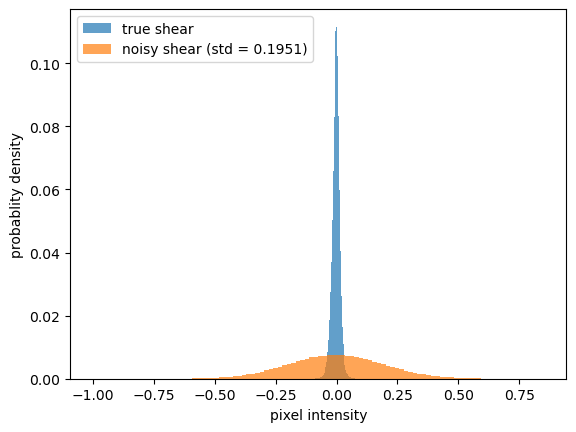

In [3]:
_ = plt.hist(img.flatten(), 500, range=(-1, 0.85), weights=np.ones(len(img.flatten()))/len(img.flatten()), alpha=0.7, label='true shear')
_ = plt.hist(img_noisy.flatten(), 100, range=(-1, 0.85), weights=np.ones(len(img.flatten()))/len(img.flatten())/5, alpha=0.7, label=f'noisy shear (std = {std})')
plt.xlabel('pixel intensity')
plt.ylabel('probablity density')
plt.legend()